<a href="https://colab.research.google.com/github/JoseHelioF/Avaliacao/blob/master/NoticiasDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte I - Aquisição de dados**

#### Referência
#### https://www.youtube.com/watch?v=Zy5sHkr5W7s&t=22s&ab_channel=Stack

### **Captura de notícias no site G1 para compor um dataset de estudos**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
lista_noticias=[]
lista_categoria=[]

### **Função para fazer o loop dentros das peginas recolhendo os textos**

In [ ]:
def topicos(base,var,cont):
    nPag=200
    
    paginas = (i for i in range(1,nPag))
   
    for pagina in paginas:
        
        fim=f'/index/feed/pagina-{pagina}.ghtml'
        endereco=base+var+fim
        response=requests.get(endereco)
        content=response.content
        #Armazena como HTML
        site=BeautifulSoup(content,'html.parser')
        #Separa as notícias atravez da tag html
        noticias=site.findAll('div',attrs={'class':'feed-post bstn-item-shape type-materia'})
        print("{0:.3f}%  -  ".format(((cont*nPag+1+pagina)/(len(Topico_var)*nPag))*100),
              pagina,"{}%".format(round(((pagina+1)/nPag)*100)),"{}%".format(round(((cont+1)/len(Topico_var))*100)),
              var)
        for noticia in noticias:
            lista_noticias.append(noticia.text)
            lista_categoria.append(var)

### **Variaveis para gerar as categoria da base de notícias**

In [ ]:
base = 'https://g1.globo.com/'
Topico_var=['ciencia','inovacao','educacao','saude','loterias','meio-ambiente']
# Topico_var=['economia','ciencia','economia/agronegocios',
#            'carnaval/2022','educacao','empreendedorismo',
#            'inovacao','loterias','meio-ambiente','saude',
#            'tecnologia','pop-arte','trabalho-e-carreira',
#             'mundo/copa-do-catar','especiais/guia-de-compras',
#             'fato-ou-fake','politica/eleicoes/2022']

for var,cont in zip(Topico_var,range(len(Topico_var))):
    topicos(base,var,cont)

0.167% 1 1% 17% ciencia
0.250% 2 2% 17% ciencia
0.333% 3 2% 17% ciencia
0.417% 4 2% 17% ciencia
0.500% 5 3% 17% ciencia
0.583% 6 4% 17% ciencia
0.667% 7 4% 17% ciencia
0.750% 8 4% 17% ciencia
0.833% 9 5% 17% ciencia
0.917% 10 6% 17% ciencia
1.000% 11 6% 17% ciencia
1.083% 12 6% 17% ciencia
1.167% 13 7% 17% ciencia
1.250% 14 8% 17% ciencia
1.333% 15 8% 17% ciencia
1.417% 16 8% 17% ciencia
1.500% 17 9% 17% ciencia
1.583% 18 10% 17% ciencia
1.667% 19 10% 17% ciencia
1.750% 20 10% 17% ciencia
1.833% 21 11% 17% ciencia
1.917% 22 12% 17% ciencia
2.000% 23 12% 17% ciencia
2.083% 24 12% 17% ciencia
2.167% 25 13% 17% ciencia
2.250% 26 14% 17% ciencia
2.333% 27 14% 17% ciencia
2.417% 28 14% 17% ciencia
2.500% 29 15% 17% ciencia
2.583% 30 16% 17% ciencia
2.667% 31 16% 17% ciencia
2.750% 32 16% 17% ciencia
2.833% 33 17% 17% ciencia
2.917% 34 18% 17% ciencia
3.000% 35 18% 17% ciencia
3.083% 36 18% 17% ciencia
3.167% 37 19% 17% ciencia
3.250% 38 20% 17% ciencia
3.333% 39 20% 17% ciencia
3.417% 40 20

KeyboardInterrupt: ignored

### **Integrando categorias e texto no mesmo DataFrame e gerando arquivo**

In [ ]:
#Salvando CSV
dfn = pd.DataFrame(lista_noticias, columns=['Textos_da_noticia'])
dfc = pd.DataFrame(lista_categoria, columns=['Categoria'])
df = dfn.join(dfc)
df.to_csv('basenoticia.csv',index_label=None)

### **Faz o download do arquivo para o disco**

In [ ]:
from google.colab import files
files.download('basenoticia.csv')

# Parte II - Tratando os dados

### **Importando bibliotecas e o DataFrame do arquivo**

In [2]:
import pandas as pd
# import seaborn as sns
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
d = pd.read_csv('basenoticia.csv',sep=",").iloc[:,1:]

### **Funções**

---



In [4]:
def recuperaPalavra(valor): 
  # texto = (d['Textos_da_noticia'].to_numpy()[1])
  palavras = valor.split()
  palavraRemont = []
  for palavra in palavras:
    x = [" "+letra if letra.isupper() else letra for letra in palavra]
    palavraRemont.append(''.join(x))
  return (" ".join(palavraRemont))
    # " ".join(palavras)

In [5]:
def geraGrafico():
  dado = pd.DataFrame()
  dado['Categoria'] = pd.value_counts(d.Categoria).index
  dado['Valor'] = pd.value_counts(d.Categoria).values

  fig, ax = plt.subplots(figsize=(9,7))

  sn.barplot(x='Categoria',y='Valor',data=dado,ax=ax,palette=['blue'])
  ax.set_frame_on(False)
  ax.set_title('Quantidade de Elemento na Categoria',loc='left',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
  ax.get_yaxis().set_visible(False)
  ax.tick_params(axis='x',length=0,labelsize=12,colors='black',rotation = 90)
  ax.set_xlabel('Categorias',labelpad=10,fontdict={'fontsize':14},color='black')
  for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
            retangulo.get_height() + 2,
            '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
            ha = 'center',
            fontsize=18,color='black')
  plt.tight_layout();

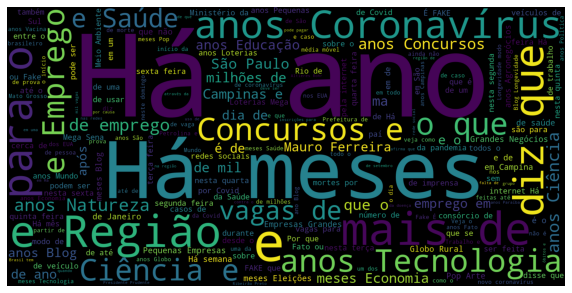

In [6]:
def geraNuvem(d,x):
  nuvem = " ".join(s for s in d['Textos_da_noticia'])
  wordcloud = WordCloud(background_color="black",
                        width=1600, height=800).generate(nuvem)
  fig, ax = plt.subplots(figsize=(10,6));
  ax.imshow(wordcloud, interpolation='bilinear');#"bilinear"
  ax.set_axis_off();
  plt.imshow(wordcloud);
  wordcloud.to_file(f"Nuvem_Noticias{x}.png")
geraNuvem(d,0)

In [7]:
#Remover stopword
def removeStopword(valor):
  stopword = set(nltk.corpus.stopwords.words('portuguese'))
  palavras = [i for i in valor.split() if not i in stopword]
  return (" ".join(palavras))

In [8]:
#Stemming
def stemming(valor):
  stemmer = nltk.stem.RSLPStemmer()
  palavras = []
  for i in valor.split():
    palavras.append(stemmer.stem(i))
  return (" ".join(palavras))


In [9]:
def removePontuacao(valor):
  tokenizer = RegexpTokenizer(r'[a-zA-z]\w*')
  tokens=tokenizer.tokenize(valor)
  tokens
  return(" ".join(tokens))

In [10]:
def funcaoPreparacao(d,funcao):
  p=[]
  for i in d['Textos_da_noticia'].to_numpy():
    p.append(funcao(i))
  d['Textos_da_noticia'] = p
  return d



In [11]:
def contaPalavra(d):
  cont = 0
  for i in (d['Textos_da_noticia']):
    cont +=len(i.split())
  print("Total de palavras:",cont)
  return cont
contaPalavra(d)

Total de palavras: 3476451


3476451

In [12]:
def removeTituloCat(valor):
  palavras = [i for i in valor.split() if not i in tituloCat]
  return (" ".join(palavras))

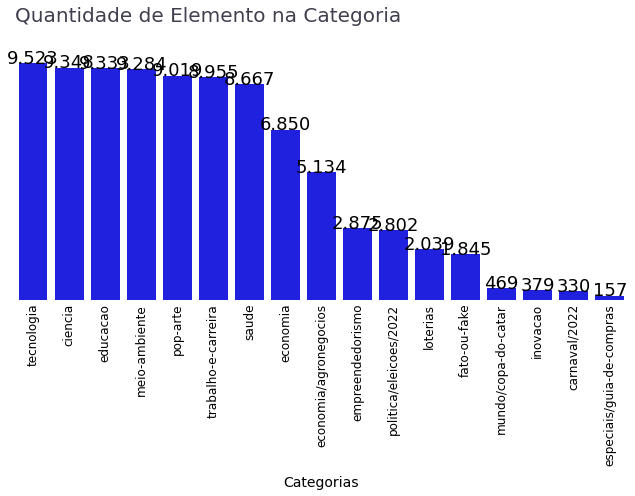

In [13]:
geraGrafico()

### **Configuração do tamanho dos dados que serão usados para o aprendizado e as categorias**

In [18]:
nNoticiaBase = 5000
# catUsada = ['economia','ciencia','economia/agronegocios',
#            'carnaval/2022','educacao','empreendedorismo',
#            'inovacao','loterias','meio-ambiente','saude',
#            'tecnologia','pop-arte','trabalho-e-carreira',
#             'mundo/copa-do-catar','especiais/guia-de-compras',
#             'fato-ou-fake','politica/eleicoes/2022']
catUsada = ['economia','ciencia','educacao','loterias','meio-ambiente']


dB = d[d.Categoria==catUsada[0]][:nNoticiaBase]
for i in range(1,len(catUsada)):
  dB = pd.concat([dB,d[d.Categoria==catUsada[i]][:nNoticiaBase]],axis = 0)
d = dB

### **Exploração das categorias no DataFrame que está configurado para o treinamento e teste de aprendizagem**


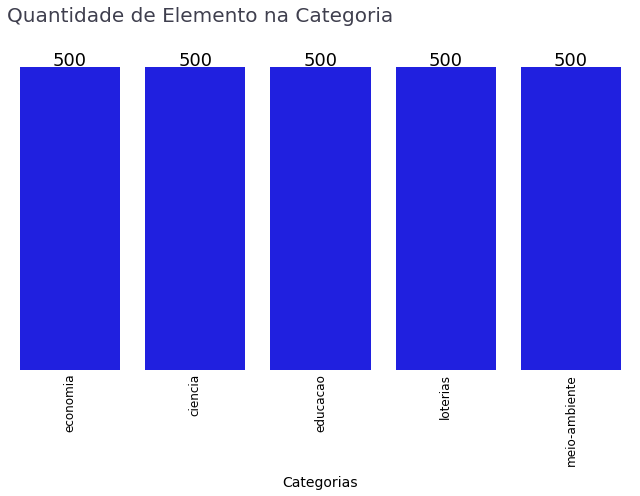

In [19]:
geraGrafico()

### **Embaralhamento do Dataframe e separação do em treino e teste. Codificação das categorias**

In [27]:
le = LabelEncoder()

d = shuffle(d , random_state=2)

df_train = d.iloc[:round(len(d)*0.8),:]
df_test = d.iloc[round(len(d)*0.8):,:]

texto_train = df_train['Textos_da_noticia'].values.tolist()
cat_train = df_train['Categoria']

texto_test = df_test['Textos_da_noticia'].values.tolist()
cat_test = df_test['Categoria']

print(cat_train)

catTansf =le.fit_transform(cat_train)
catTansf

21972         educacao
36749    meio-ambiente
34329         loterias
34687         loterias
21786         educacao
             ...      
7161           ciencia
42            economia
21902         educacao
22080         educacao
7228           ciencia
Name: Categoria, Length: 2000, dtype: object


array([2, 4, 3, ..., 2, 2, 0])

### **Fazer a codificação do texto usando TF IDF**

In [28]:
vectorizer = TfidfVectorizer()
X_train_tfidf_vectorize = vectorizer.fit_transform(texto_train)

### **Criando o classificador**

In [29]:
cfl = SGDClassifier(loss="hinge", penalty='l2',alpha=1e-3,random_state=42,max_iter=5,tol=None)
# cfl = svm.SVC(tol = 1e-3)
# cfl = MultinomialNB()
cfl.fit(X_train_tfidf_vectorize,catTansf)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

### **Treinando o classificador e fazendo a previsão com a parte teste do Dataframe**

In [30]:

cat_test = le.transform(cat_test)
vect_transform = vectorizer.transform(texto_test)
predict = cfl.predict(vect_transform)
# cat_test = cat_test.to_numpy().astype(np.int)

class_repor =metrics.classification_report(cat_test,predict)
cm =metrics.confusion_matrix(cat_test,predict)
print(class_repor)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       104
           1       0.92      0.95      0.93       104
           2       0.96      0.89      0.92        98
           3       1.00      1.00      1.00       104
           4       0.84      0.92      0.88        90

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

[[ 93   1   1   0   9]
 [  0  99   3   0   2]
 [  1   5  87   0   5]
 [  0   0   0 104   0]
 [  4   3   0   0  83]]


### Parear código x rotulo da categoria 

In [121]:
listadecat = [i for i in range(len(catUsada))]
listadecatinv = le.inverse_transform(listadecat)
for i,j in zip(listadecat,listadecatinv):
  print(i,'-',j)

0 - ciencia
1 - economia
2 - educacao
3 - inovacao
4 - loterias
5 - meio-ambiente
6 - saude


### **Matriz de confusão**

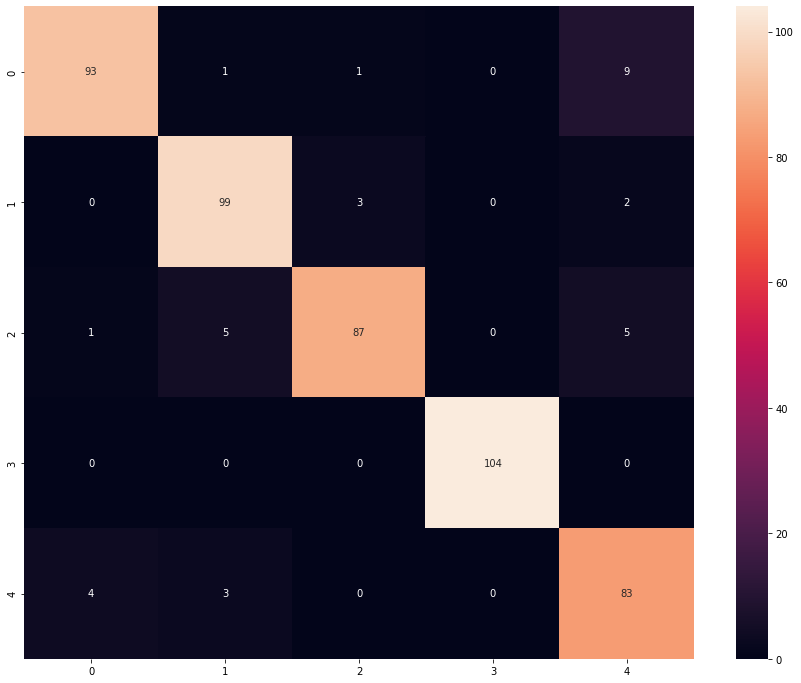

In [31]:

plt.figure(figsize = (15,12))
sn.heatmap(cm, annot=True,fmt='.0f');

### **Usando uma noticia para fazer a previsão e a probabilidade de resposta entre as categorias possiveis**

In [19]:
texto =[ """
Texto prevê estourar teto agroindustria em 198 bi; governo eleito diz ser necessário
 para pagar Auxílio Brasil de  600. Economistas apontam incertezas; senador
  propôs elevar teto em R$ 80 bi."""]
texto = vectorizer.transform(texto)
texto2 =texto
# texto = cfl.predict_proba(texto)
print(texto)
texto = cfl.predict(texto2)
print(texto)

  (0, 11332)	0.1861233060763486
  (0, 11327)	0.45471465226984714
  (0, 10682)	0.09088078834134772
  (0, 10653)	0.23941750387904875
  (0, 9550)	0.23941750387904875
  (0, 9409)	0.18153823929521753
  (0, 8685)	0.06218977346296112
  (0, 8630)	0.11548397126566123
  (0, 8190)	0.23941750387904875
  (0, 6521)	0.23941750387904875
  (0, 6074)	0.13122092970140858
  (0, 4580)	0.09944497012102786
  (0, 4536)	0.17092927903018412
  (0, 4319)	0.10675470917512604
  (0, 3731)	0.03396770508076558
  (0, 2275)	0.10098983670222776
  (0, 2152)	0.4376009876995225
  (0, 1957)	0.18871137753125683
  (0, 1578)	0.17092927903018412
  (0, 717)	0.17406312833222343
  (0, 589)	0.21880049384976125
  (0, 157)	0.23941750387904875
[4]


### **Total de instância por categoria no teste**

In [20]:
df_test.groupby('Categoria').count()

NameError: ignored

### Removendo pontuação e números

In [24]:
funcaoPreparacao(d,removePontuacao)

,Textos_da_noticia,Categoria
0,R O fecha semana mil vagas trabalho plataforma...,economia
1,Mercado recebe nomeação Haddad Ministério Faze...,economia
2,Como cultivar aroeira Confira cartilha gratuit...,economia
3,Nova Nissan Frontier reúne força potência traz...,economia
4,O C D I Teste conhecimentos sobre título quiz ...,economia
...,...,...
36783,Amazônia gera energia elétrica país milhão pes...,meio-ambiente
36784,Oceanógrafo Noronha negou transferência Sertão...,meio-ambiente
36785,Amazônia maior número incêndios maio desde De ...,meio-ambiente
36786,Biólogo descobre rede nacional tráfico abelhas...,meio-ambiente


### Removendo StopWords

In [23]:
funcaoPreparacao(d,removeStopword)


,Textos_da_noticia,Categoria
0,"R O fecha semana 1,2 mil vagas trabalho plataf...",economia
1,Mercado recebe nomeação Haddad Ministério Faze...,economia
2,Como cultivar aroeira Confira cartilha gratuit...,economia
3,Nova Nissan Frontier reúne força potência traz...,economia
4,O C D I? Teste conhecimentos sobre título quiz...,economia
...,...,...
36783,"Amazônia gera 26% energia elétrica país, 1 mil...",meio-ambiente
36784,Oceanógrafo Noronha negou transferência Sertão...,meio-ambiente
36785,Amazônia maior número incêndios maio desde 200...,meio-ambiente
36786,Biólogo descobre rede nacional tráfico abelhas...,meio-ambiente


### **Radical de palavras**

In [25]:
funcaoPreparacao(d,stemming)

,Textos_da_noticia,Categoria
0,r o fech seman mil vag trabalh plataform empre...,economia
1,merc receb nome haddad minist fazend cautel es...,economia
2,com cultiv aro conf cartilh gratuit sobr tem h...,economia
3,nov nissan fronti reún forç pot traz d n a jap...,economia
4,o c d i test conhec sobr títul quiz há hor int...,economia
...,...,...
36783,amazôn ger energ elétr país milhã pesso escur ...,meio-ambiente
36784,oceanógraf noronh neg transfer sert demit i c ...,meio-ambiente
36785,amazôn mai númer incêndi mai desd de acord dad...,meio-ambiente
36786,biólog descobr red nacion tráf abelh val cheg ...,meio-ambiente


### **Refazendo nuvem de palavras**

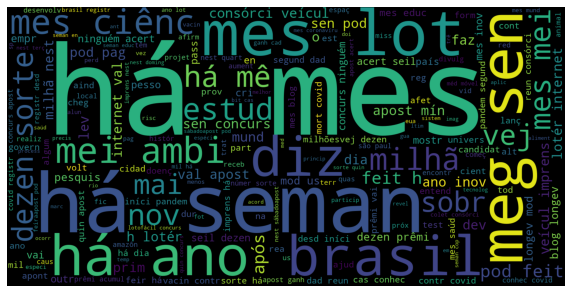

In [24]:
geraNuvem(d,2)

In [21]:
print(catUsada)
tituloCat = removePontuacao((" ".join(catUsada)))
print('\n',tituloCat)
tituloCat = stemming(tituloCat)
print('\n',tituloCat)


['economia', 'ciencia', 'educacao', 'loterias', 'meio-ambiente']

 economia ciencia educacao loterias meio ambiente

 econom cienc educaca lot mei ambi


Total de palavras: 63926


63926

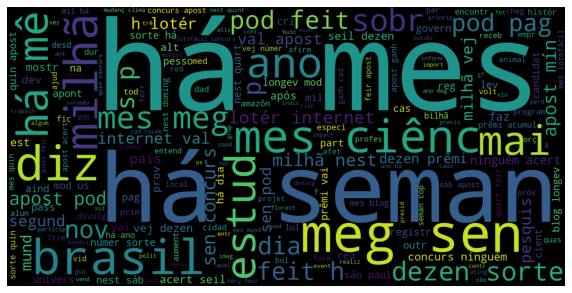

In [26]:
funcaoPreparacao(d,removeTituloCat)
geraNuvem(d,3)
contaPalavra(d)

In [22]:
funcaoPreparacao(d,recuperaPalavra)

,Textos_da_noticia,Categoria
0,"R O fecha semana com 1,2 mil vagas de trabalh...",economia
1,Mercado recebe nomeação de Haddad ao Minist...,economia
2,Como cultivar aroeira Confira cartilha gratui...,economia
3,Nova Nissan Frontier reúne força e potência...,economia
4,O que é C D I? Teste seus conhecimentos sobr...,economia
...,...,...
36783,Amazônia gera 26% da energia elétrica do país...,meio-ambiente
36784,Oceanógrafo de Noronha que negou transferênc...,meio-ambiente
36785,Amazônia tem maior número de incêndios em mai...,meio-ambiente
36786,Biólogo descobre rede nacional de tráfico de ...,meio-ambiente


In [123]:
frases  = " ".join(s for s in d['Textos_da_noticia'])
palavras = nltk.word_tokenize(frases)
palavras = [palavras.lower() for palavras in palavras if palavras.isalpha()]
palavras_frequentes = nltk.FreqDist(palavras)
palavras_frequentes
# for key in palavras_frequentes:
#   print(key + ' - ' + str(palavras_frequentes[key]))

FreqDist({'há': 3379, 'mes': 1794, 'r': 1176, 'seman': 994, 'ano': 822, 'pod': 742, 'apost': 667, 'milhã': 601, 'brasil': 567, 'nest': 567, ...})

In [92]:
print(d['Textos_da_noticia'].to_numpy()[19])
funcaoPreparacao(d,recuperaPalavra)
print(d['Textos_da_noticia'].to_numpy()[19])
funcaoPreparacao(d,removePontuacao)
print(d['Textos_da_noticia'].to_numpy()[19])
funcaoPreparacao(d,removeStopword)
print(d['Textos_da_noticia'].to_numpy()[19])
funcaoPreparacao(d,removePontuacao)
print(d['Textos_da_noticia'].to_numpy()[19])
funcaoPreparacao(d,stemming)
print(d['Textos_da_noticia'].to_numpy()[19])
funcaoPreparacao(d,removeTituloCat)
print(d['Textos_da_noticia'].to_numpy()[19])

Brasil deixa 'vice-lanterna' de ranking de competitividade pela 1ª vez em 12 anos, diz CNILista inclui outros 17 países com características similares ao Brasil ou que competem com ele no mercado mundial.Ontem Economia 
 Brasil deixa 'vice-lanterna' de ranking de competitividade pela 1ª vez em 12 anos, diz  C N I Lista inclui outros 17 países com características similares ao  Brasil ou que competem com ele no mercado mundial. Ontem  Economia
Brasil deixa vice lanterna de ranking de competitividade pela vez em anos diz C N I Lista inclui outros países com características similares ao Brasil ou que competem com ele no mercado mundial Ontem Economia
Brasil deixa vice lanterna ranking competitividade vez anos diz C N I Lista inclui outros países características similares Brasil competem mercado mundial Ontem Economia
Brasil deixa vice lanterna ranking competitividade vez anos diz C N I Lista inclui outros países características similares Brasil competem mercado mundial Ontem Economia
brasil